In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#path_save_signal ='/home/david/Desktop/signal_LM.xlsx'
#path_save_shuffle = '/home/david/Desktop/shuff_LM.xlsx'
#path_save_signal ='/home/david/Desktop/signal_LM_dist.xlsx'
#path_save_shuffle = '/home/david/Desktop/shuff_LM_dist.xlsx'


#path_save_signal ='C:\\Users\\David\\Desktop\\signal_LM_dist.xlsx'
#path_save_shuffle = 'C:\\Users\\David\\Desktop\\shuff_LM_dist.xlsx'


presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active




C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


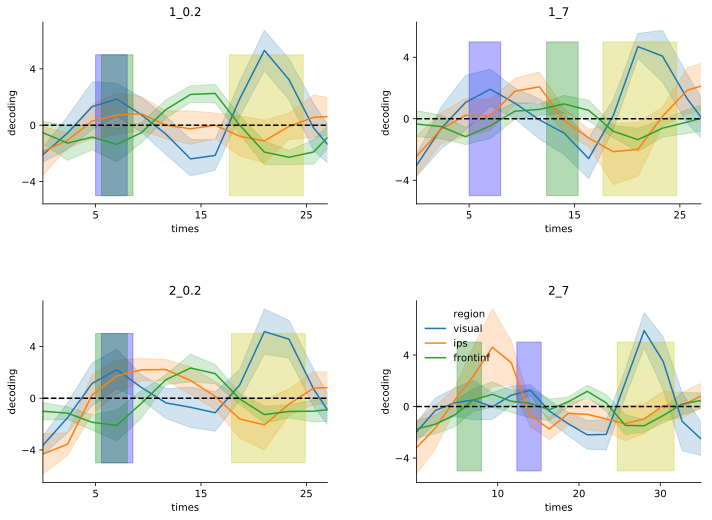

In [7]:

path_save_signal ='C:\\Users\\David\\Desktop\\signal_LM.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\shuff_LM.xlsx'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)
df_t = pd.concat([Df, Df_shuff]) #concatenate the files


##### Measure of difference to shuffle
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: #['visual', 'ips', 'pfc']: ['front_sup', 'front_mid', 'front_inf']
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_t.subject.unique():
            #decode_timepoint = []
            for times in df_t.times.unique():                
                values = df_t.loc[(df_t['label']=='shuffle') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'] ## all shuffled reconstructions
                value_decoding = df_t.loc[(df_t['label']=='signal') & (df_t['condition']==condition) & (df_t['region'] ==brain_region)  & (df_t['subject'] ==subject) & (df_t['times']==times), 'decoding'].values[0] #the real reconstruction
                #### zscore method
                prediction = (value_decoding - np.mean(values)) / np.std(values)
                subj_decoding.append([prediction, times, subject, brain_region, condition])

#

dft = pd.DataFrame(subj_decoding) 
dft.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle



pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]


fig = plt.figure(figsize=(10,8))
for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
    #features of the plot for the different conditions. Fixed values
    if condition == '1_0.2':
        delay1 = 0.2
        delay2 = 11.8
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [0, 27]
        
    elif condition == '1_7':
        delay1 = 7
        delay2 = 5
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [0, 27]
        
    elif condition == '2_0.2':
        delay1 = 0.2
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2   
        xlim = [0, 27]
        
    elif condition == '2_7':
        delay1 = 7
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2
        xlim = [0, 35]
        
    
    start_hrf = 4 #start of the Hemodynamic response (4seconds)
    sec_hdrf = 3 #time it can last
       
    d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
    t_p1 = (start_hrf +t_p) ## strat of target (time)
    r_t1=  (start_hrf + r_t) ## start of response (time)
    #
    d_p2 = d_p1 + sec_hdrf # end of distractor (time)
    t_p2 = t_p1 + sec_hdrf # end of target (time)
    r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)
    
    y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
    y_vl_max = 5 #◙df_all_by_subj.Decoding.max()
    
    #fig = plt.figure()
    ax = fig.add_subplot(2,2, indx_c+1) 
    #ax = sns.lineplot(x='times', y='decoding',  color = 'black', data=n) #figure to get the intervals of shuffle
    #ax.lines[0].set_linestyle("--")
    sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'],  ci=69, palette=pal, data=dft.loc[ (dft['condition']==condition)]) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'
    
    plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
    plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
    plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
    plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response
    TITLE_BR = condition 
    plt.title(TITLE_BR) #condition title
    plt.gca().spines['right'].set_visible(False) #no right axis
    plt.gca().spines['top'].set_visible(False) #no  top axis
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.xticks([5,15,25]) #just this tcks
    plt.yticks([-4, 0 , 4])
    plt.xlim(xlim)
    if indx_c==3: #legend in just this condition (to avoid repetitions)       
        plt.gca().legend(loc= 2, frameon=False)
        plt.xticks([10, 20 ,30])
        
    else:
        plt.gca().legend(loc= 1, frameon=False).remove()
    


##
plt.suptitle( '', fontsize=18) ## main title
plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
plt.show(block=False) #show



In [ ]:

path_save_signal ='C:\\Users\\David\\Desktop\\signal_LM_dist.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\shuff_LM_dist.xlsx'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)
df_d = pd.concat([Df, Df_shuff]) #concatenate the files


#### Distractor

##### Measure of difference to shuffle
subj_decoding=[]
for brain_region in ['visual', 'ips', 'frontinf']: #['visual', 'ips', 'pfc']: ['front_sup', 'front_mid', 'front_inf']
    for condition in ['1_0.2', '1_7', '2_0.2', '2_7']:        
        for subject in df_d.subject.unique():
            #decode_timepoint = []
            for times in df_d.times.unique():                
                values = df_d.loc[(df_d['label']=='shuffle') & (df_d['condition']==condition) & (df_d['region'] ==brain_region)  & (df_d['subject'] ==subject) & (df_d['times']==times), 'decoding'] ## all shuffled reconstructions
                value_decoding = df_d.loc[(df_d['label']=='signal') & (df_d['condition']==condition) & (df_d['region'] ==brain_region)  & (df_d['subject'] ==subject) & (df_d['times']==times), 'decoding'].values[0] #the real reconstruction
                #### zscore method
                prediction = (value_decoding - np.mean(values)) / np.std(values)
                subj_decoding.append([prediction, times, subject, brain_region, condition])

#

dfd = pd.DataFrame(subj_decoding) 
dfd.columns=['decoding', 'times', 'subject', 'region', 'condition' ] #decode compared to shuffle



pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]


fig = plt.figure(figsize=(10,8))
for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
    #features of the plot for the different conditions. Fixed values
    if condition == '1_0.2':
        delay1 = 0.2
        delay2 = 11.8
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [0, 27]
        
    elif condition == '1_7':
        delay1 = 7
        delay2 = 5
        cue=0
        t_p = cue + presentation_period_cue + pre_stim_period 
        d_p = t_p + presentation_period +delay1 
        r_t = d_p + presentation_period + delay2
        xlim = [0, 27]
        
    elif condition == '2_0.2':
        delay1 = 0.2
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2   
        xlim = [0, 27]
        
    elif condition == '2_7':
        delay1 = 7
        delay2 = 12
        cue=0
        d_p = cue + presentation_period_cue + pre_stim_period 
        t_p = d_p + presentation_period +delay1 
        r_t = t_p + presentation_period + delay2
        xlim = [0, 35]
        
    
    start_hrf = 4 #start of the Hemodynamic response (4seconds)
    sec_hdrf = 3 #time it can last
       
    d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
    t_p1 = (start_hrf +t_p) ## strat of target (time)
    r_t1=  (start_hrf + r_t) ## start of response (time)
    #
    d_p2 = d_p1 + sec_hdrf # end of distractor (time)
    t_p2 = t_p1 + sec_hdrf # end of target (time)
    r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)
    
    y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
    y_vl_max = 5 #◙df_all_by_subj.Decoding.max()
    
    #fig = plt.figure()
    ax = fig.add_subplot(2,2, indx_c+1) 
    #ax = sns.lineplot(x='times', y='decoding',  color = 'black', data=n) #figure to get the intervals of shuffle
    #ax.lines[0].set_linestyle("--")
    sns.lineplot( ax=ax, x="times", y="decoding", hue='region', hue_order =  ['visual', 'ips', 'frontinf'],  ci=69, palette=pal, data=dfd.loc[ (dfd['condition']==condition)]) #, 'visual', 'ips',  'frontmid', 'frontsup', 'frontinf'
    
    plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
    plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
    plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
    plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response
    TITLE_BR = condition 
    plt.title(TITLE_BR) #condition title
    plt.gca().spines['right'].set_visible(False) #no right axis
    plt.gca().spines['top'].set_visible(False) #no  top axis
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.xticks([5,15,25]) #just this tcks
    plt.yticks([-4, 0 , 4])
    plt.xlim(xlim)
    if indx_c==3: #legend in just this condition (to avoid repetitions)       
        plt.gca().legend(loc= 2, frameon=False)
        plt.xticks([10, 20 ,30])
        
    else:
        plt.gca().legend(loc= 1, frameon=False).remove()
    


##
plt.suptitle( '', fontsize=18) ## main title
plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
plt.show(block=False) #show